In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORTAR LIBRERIAS, MÓDULOS Y FUNCIONES NECESARIAS**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tabulate import tabulate
from sklearn.utils import resample, shuffle
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

**LECTURA, LIMPIEZA, ANÁLISIS DESCRIPTIVO, ANÁLISIS EXPLORATORIO Y PREPARACIÓN DE LOS DATOS**

**Lectura**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv' ,encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


**Análsis descriptivo**

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Análisis exploratorio**

In [ ]:
import matplotlib.pyplot as plt
frecuencia_paises=df['Country'].value_counts()

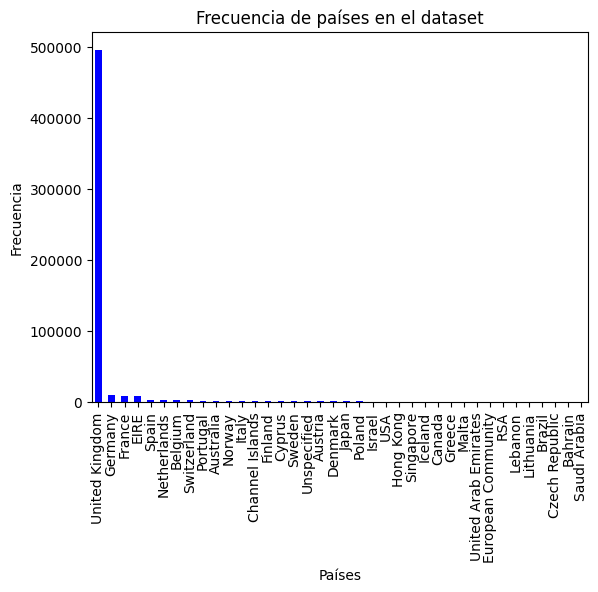

In [ ]:
# Crear la gráfica de barras
frecuencia_paises.plot(kind='bar', color='blue')

# Añadir etiquetas y título
plt.xlabel('Países')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de países en el dataset')

# Mostrar la gráfica
plt.show()

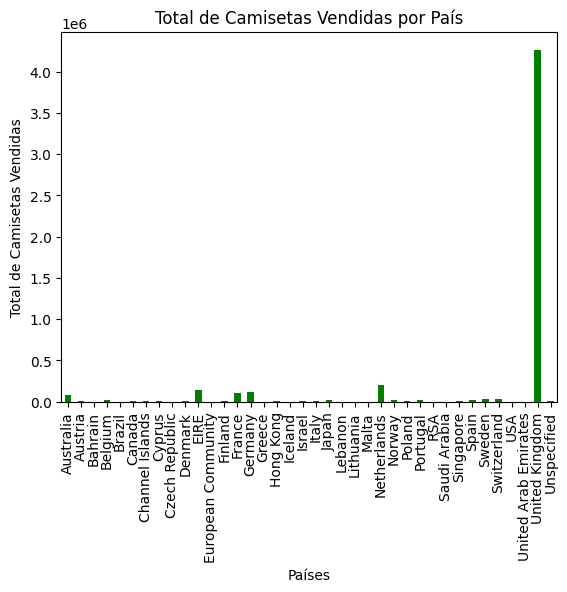

In [ ]:
# Calcular la suma de camisetas vendidas por país
total_camisetas_por_pais = df.groupby('Country')['Quantity'].sum()

# Crear la gráfica de barras
total_camisetas_por_pais.plot(kind='bar', color='green')

# Añadir etiquetas y título
plt.xlabel('Países')
plt.ylabel('Total de Camisetas Vendidas')
plt.title('Total de Camisetas Vendidas por País')

# Mostrar la gráfica
plt.show()

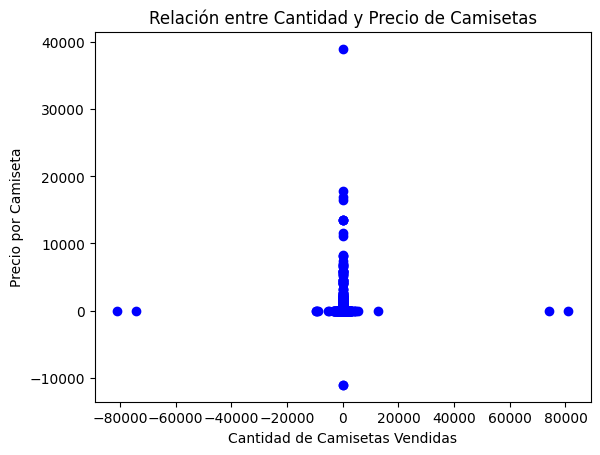

In [ ]:
# Crear un gráfico de dispersión
plt.scatter(df['Quantity'], df['UnitPrice'], color='blue')

# Añadir etiquetas y título
plt.xlabel('Cantidad de Camisetas Vendidas')
plt.ylabel('Precio por Camiseta')
plt.title('Relación entre Cantidad y Precio de Camisetas')

# Mostrar la gráfica
plt.show()

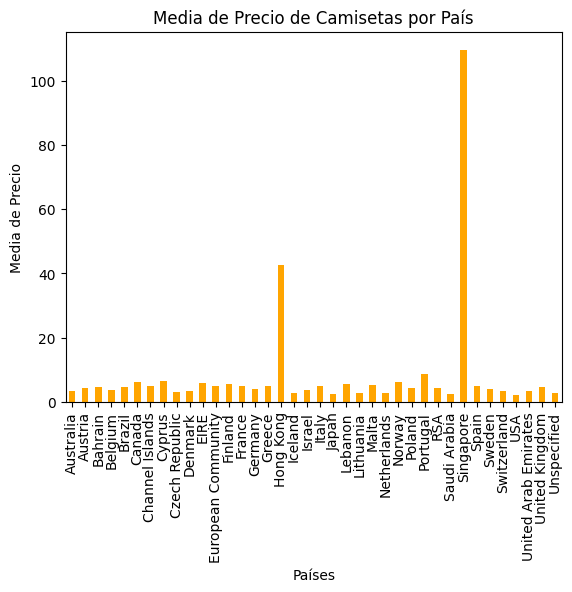

In [ ]:
# Calcular la media de precio por país
media_precio_por_pais = df.groupby('Country')['UnitPrice'].mean()

# Crear la gráfica de barras
media_precio_por_pais.plot(kind='bar', color='orange')

# Añadir etiquetas y título
plt.xlabel('Países')
plt.ylabel('Media de Precio')
plt.title('Media de Precio de Camisetas por País')

# Mostrar la gráfica
plt.show()

**Limpieza/Preparación de los datos**\
Voy a limpiar/preparar y dividir en train y test, 2 dataframes, el df2 y df_minimos. El primero para un modelo en el que el tiempo no tenga importancia, y el segundo para otro que si tenga en cuenta el tiempo

Primero eliminamos columnas que no vamos a utilizar del df principal

In [ ]:
df=df.drop(['InvoiceNo', 'StockCode', 'Description', 'CustomerID'],axis=1)

Nos quedamos solo con las filas cuyo UnitPrice este entre el q25 y q75 de esa columna, ya que hay valores que van a fastidiar la prediccion(como hemos visto en el análisis descriptivo y exploratorio)

In [ ]:
# Calcular los cuantiles de la columna 'unitprice'
q25 = df['UnitPrice'].quantile(0.25)
q75 = df['UnitPrice'].quantile(0.75)

# Filtrar las filas basadas en los cuantiles
df = df[(df['UnitPrice'] >= q25) & (df['UnitPrice'] <= q75)]
df

,Quantity,InvoiceDate,UnitPrice,Country
0,6,12/1/2010 8:26,2.55,United Kingdom
1,6,12/1/2010 8:26,3.39,United Kingdom
2,8,12/1/2010 8:26,2.75,United Kingdom
3,6,12/1/2010 8:26,3.39,United Kingdom
4,6,12/1/2010 8:26,3.39,United Kingdom
...,...,...,...,...
541899,4,12/9/2011 12:50,3.75,France
541900,4,12/9/2011 12:50,3.75,France
541901,8,12/9/2011 12:50,1.95,France
541902,12,12/9/2011 12:50,1.95,France


Lo mismo con la columna de Quantity

In [ ]:
# Calcular los cuantiles de la columna 'unitprice'
q25 = df['Quantity'].quantile(0.25)
q75 = df['Quantity'].quantile(0.75)

# Filtrar las filas basadas en los cuantiles
df = df[(df['Quantity'] >= q25) & (df['Quantity'] <= q75)]
df

,Quantity,InvoiceDate,UnitPrice,Country
0,6,12/1/2010 8:26,2.55,United Kingdom
1,6,12/1/2010 8:26,3.39,United Kingdom
2,8,12/1/2010 8:26,2.75,United Kingdom
3,6,12/1/2010 8:26,3.39,United Kingdom
4,6,12/1/2010 8:26,3.39,United Kingdom
...,...,...,...,...
541898,4,12/9/2011 12:50,3.75,France
541899,4,12/9/2011 12:50,3.75,France
541900,4,12/9/2011 12:50,3.75,France
541901,8,12/9/2011 12:50,1.95,France


Ahora creamos el df2, el cual va a ser como el df pero eliminando algunas filas en las que el valor de país es United kingdom, ya que en este caso, el resultado de la prediccion del modelo utilizando este dtf para entrenarlo, no va a cambiar practicamente nada y así, de esta forma, agilizaremos el entrenamiento, validación y evaluación de este modelo, además de equilibrar un poco la cantidad de filas de cada país, aunque al no tratarse de un problema de clasificación, podría haber eliminado cualquier otras filas.

In [ ]:
num_filas_a_eliminar = 400000

# Encontrar índices de filas donde el país es 'Inglaterra'
indices_inglaterra = df[df['Country'] == 'United Kingdom'].index

# Eliminar las primeras num_filas_a_eliminar filas con 'Inglaterra'
df2 = df.drop(indices_inglaterra[:num_filas_a_eliminar])

df2['Country'].value_counts()

France                  2465
Germany                 2349
EIRE                    1868
Spain                    801
Belgium                  580
Portugal                 493
Switzerland              450
Cyprus                   228
Italy                    198
Channel Islands          178
Unspecified              176
Australia                174
Netherlands              165
Norway                   159
Finland                  156
Austria                  108
Israel                    72
Poland                    71
Hong Kong                 71
Sweden                    69
USA                       49
Iceland                   46
Japan                     40
Denmark                   37
Greece                    35
Canada                    33
Malta                     29
RSA                       27
Singapore                 26
European Community        15
Lebanon                   10
Brazil                     5
Bahrain                    5
Lithuania                  5
United Arab Em

Aplicar codificación one-hot a las columnas categóricas y estandarizar las columnas numéricas de nuestra futura 'X' de nuestro df2.\ Para ello:
1.Definir dos listas, categoricas y numericas, que contienen los nombres de las columnas que se consideran categóricas y numéricas, respectivamente.\
2.Crear dos pipelines de transformación utilizando la clase Pipeline de scikit-learn:\
-Para las columnas categóricas (cat_pipe): SimpleImputer: Se utiliza para manejar valores faltantes en las columnas categóricas, llenando los valores faltantes con la cadena 'missing'. OneHotEncoder: Se utiliza para realizar codificación one-hot en las columnas categóricas.\
-Para las columnas numéricas (num_pipe): SimpleImputer: Se utiliza para manejar valores faltantes en las columnas numéricas, llenando los valores faltantes con la mediana. StandardScaler: Se utiliza para estandarizar las columnas numéricas (restar la media y escalar a la varianza unitaria).\
3.Utilizar la clase ColumnTransformer para aplicar a columnas categoricas y numericas sus respectivos pipelines.

In [ ]:
categoricas = ['Country']
print(f"Las columnas categoricas son: {categoricas}")

#Define numeric columns
numericas = ['UnitPrice']
print(f"Las columnas numericas son: {numericas}")


cat_pipe = Pipeline([('imputer', SimpleImputer(strategy='constant')),
                     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])


num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')),
                     ('scaler', StandardScaler())])


preprocessor = ColumnTransformer(transformers=[('cat', cat_pipe, categoricas),
                                               ('num', num_pipe, numericas)])

preprocessor.fit(df2)

x = pd.DataFrame(preprocessor.transform(df2))
display(x)

Las columnas categoricas son: ['Country']
Las columnas numericas son: ['UnitPrice']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.624577
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.624577
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.618424
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.115347
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.639268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.624577
11197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.624577
11198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.624577
11199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.639268


Dividir los datos en train y test con train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, df2['Quantity'], train_size = 0.8)

In [ ]:
X_train.shape, y_train.shape

((8960, 37), (8960,))

Adaptar la forma de los datos a la red neuronal

In [ ]:
y_train=np.array(y_train).reshape(y_train.shape[0],1)
y_test=np.array(y_test).reshape(y_test.shape[0],1)
X_train.shape,y_train.shape

((8960, 37), (8960, 1))

Ya hemos preparado el df2 ahora vamos con el df_limpios

Primero vamos a transformar la columna InvoiceDate a un formato más manejable

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df

<ipython-input-102-b760d599c76e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


,Quantity,InvoiceDate,UnitPrice,Country
0,6,2010-12-01 08:26:00,2.55,United Kingdom
1,6,2010-12-01 08:26:00,3.39,United Kingdom
2,8,2010-12-01 08:26:00,2.75,United Kingdom
3,6,2010-12-01 08:26:00,3.39,United Kingdom
4,6,2010-12-01 08:26:00,3.39,United Kingdom
...,...,...,...,...
541898,4,2011-12-09 12:50:00,3.75,France
541899,4,2011-12-09 12:50:00,3.75,France
541900,4,2011-12-09 12:50:00,3.75,France
541901,8,2011-12-09 12:50:00,1.95,France


El siguiente paso es agrupar las filas de df  con la columna InvoiceDate ya transformada, por días, es decir que solo haya una fila por día, para ello nos quedamos únicamente con la fila cuyo Quantity es mayor

In [ ]:
indices_maximos = df.groupby('InvoiceDate')['Quantity'].idxmax()

# Selecciona las filas correspondientes a los índices mínimos
df_minimos = df.loc[indices_maximos].reset_index()
df_minimos

,index,Quantity,InvoiceDate,UnitPrice,Country
0,2,8,2010-12-01 08:26:00,2.75,United Kingdom
1,7,6,2010-12-01 08:28:00,1.85,United Kingdom
2,12,8,2010-12-01 08:34:00,3.75,United Kingdom
3,47,6,2010-12-01 09:01:00,1.85,United Kingdom
4,51,8,2010-12-01 09:02:00,2.75,United Kingdom
...,...,...,...,...,...
14223,541862,10,2011-12-09 12:20:00,1.65,United Kingdom
14224,541863,6,2011-12-09 12:21:00,2.08,United Kingdom
14225,541879,8,2011-12-09 12:31:00,3.75,United Kingdom
14226,541890,8,2011-12-09 12:49:00,2.95,United Kingdom


Ahora aplicamos el preprocessor creado anteriormente a df_minimos, con la misma intención que antes, es decir estandarizar columnas numéricas y aplicar codificación one hot a las categóricas


In [ ]:
preprocessor.fit(df_minimos)
y = pd.DataFrame(preprocessor.transform(df_minimos))
y['InvoiceDate'] = df_minimos['InvoiceDate']
display(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,InvoiceDate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.741547,2010-12-01 08:26:00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.429079,2010-12-01 08:28:00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.042243,2010-12-01 08:34:00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.429079,2010-12-01 09:01:00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.741547,2010-12-01 09:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.689218,2011-12-09 12:20:00
14224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.129919,2011-12-09 12:21:00
14225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.042243,2011-12-09 12:31:00
14226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.001686,2011-12-09 12:49:00


Por último, dividimos df_minimos resultante en secuencias(que en mi caso representaran las horas aproximadamente), asignando a cada una su repectiva etiqueta

In [ ]:
y=pd.DataFrame(y).drop('InvoiceDate',axis=1)

sequence_length = 60  # Longitud de la secuencia
sequences = []
labels = []

# Crea las secuencias y las etiquetas
for i in range(len(y) - sequence_length):
    sequence = y.iloc[i:i + sequence_length]  # Obtén la secuencia de longitud N
    target = df_minimos.iloc[i + sequence_length][1]
    sequences.append(sequence.values)  # Agrega la secuencia como un array de NumPy
    labels.append([target])

# Convierte las listas de secuencias y etiquetas en arrays de NumPy para usar en el modelo
sequences = np.array(sequences)
labels = np.array(labels)

In [ ]:
sequences.shape

(14168, 60, 38)

**CREACIÓN, ENTRENAMIENTO Y VALIDACIÓN DE LOS MODELOS**

**Modelo 1**

Crear modelo

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, input_shape=(37,1), return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1, kernel_initializer='normal'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 37, 128)           66560     
                                                                 
 lstm_16 (LSTM)              (None, 37, 64)            49408     
                                                                 
 lstm_17 (LSTM)              (None, 64)                33024     
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 151617 (592.25 KB)
Trainable params: 151

Compilar y entrenar modelo

In [ ]:
#Compilar
model.compile(optimizer='adam', loss='mae')

#Para parar el entrenamiento cuando la pérdida no mejore y guardar el modelo en nuestro dispositivo:
filepath="drive/MyDrive/ModelosPesos/Pesos1_PracticaAA.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

es = EarlyStopping(monitor='val_loss', patience=5)

callbacks_list = [checkpoint, es]

#Entrenar
history = model.fit(np.array(X_train), y_train, epochs=10, batch_size=16, validation_data=(np.array(X_test), y_test), callbacks=callbacks_list)

Epoch 1/10
557/560 [============================>.] - ETA: 0s - loss: 1.9981
Epoch 1: val_loss improved from inf to 1.88395, saving model to drive/MyDrive/ModelosPesos/Pesos1_PracticaAA.best.hdf5
560/560 [==============================] - 13s 11ms/step - loss: 1.9983 - val_loss: 1.8839
Epoch 2/10
  8/560 [..............................] - ETA: 4s - loss: 1.9680

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


558/560 [============================>.] - ETA: 0s - loss: 1.8238
Epoch 2: val_loss improved from 1.88395 to 1.76700, saving model to drive/MyDrive/ModelosPesos/Pesos1_PracticaAA.best.hdf5
560/560 [==============================] - 6s 11ms/step - loss: 1.8236 - val_loss: 1.7670
Epoch 3/10
558/560 [============================>.] - ETA: 0s - loss: 1.7353
Epoch 3: val_loss improved from 1.76700 to 1.71865, saving model to drive/MyDrive/ModelosPesos/Pesos1_PracticaAA.best.hdf5
560/560 [==============================] - 6s 10ms/step - loss: 1.7344 - val_loss: 1.7186
Epoch 4/10
559/560 [============================>.] - ETA: 0s - loss: 1.6834
Epoch 4: val_loss improved from 1.71865 to 1.65801, saving model to drive/MyDrive/ModelosPesos/Pesos1_PracticaAA.best.hdf5
560/560 [==============================] - 5s 9ms/step - loss: 1.6827 - val_loss: 1.6580
Epoch 5/10
556/560 [============================>.] - ETA: 0s - loss: 1.6291
Epoch 5: val_loss did not improve from 1.65801
560/560 [=========

Evaluar

In [ ]:
model.evaluate(np.array(X_test), y_test)

71/71 [==============================] - 0s 5ms/step - loss: 1.5735


1.5735012292861938

Visualizar entrenamiento y validacion

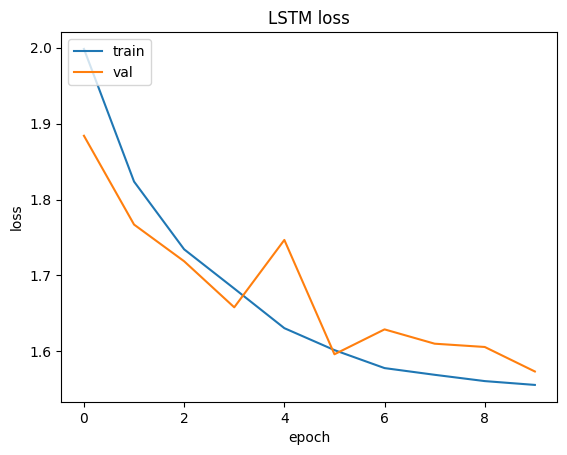

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Probar con otras funciones de pérdida para asegurarnos del buen funcionamiento del modelo

In [ ]:
from keras import metrics

print("MAE: ", np.array(metrics.mean_absolute_error(y_test,model.predict(np.array(X_test)))).mean())
print("MSE: ", np.array(metrics.mean_squared_error(y_test, model.predict((np.array(X_test))))).mean())
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,model.predict((np.array(X_test))))).mean())
print("MAPE: ", np.array(metrics.mean_absolute_percentage_error(y_test,model.predict((np.array(X_test))))).mean(),'\n')

71/71 [==============================] - 2s 5ms/step
MAE:  1.5735012
71/71 [==============================] - 0s 5ms/step
MSE:  5.918626
71/71 [==============================] - 1s 8ms/step
RMSE:  1.5735012
71/71 [==============================] - 1s 7ms/step
MAPE:  61.104404 



**Modelo 2**

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras import regularizers

model2 = Sequential()
model2.add(LSTM(64, input_shape=(60, 38), return_sequences=True, kernel_regularizer=regularizers.l2(0.01)))
model2.add(LSTM(64, kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dense(16))
model2.add(Dense(1, kernel_initializer='normal'))


model2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_39 (LSTM)              (None, 60, 64)            26368     
                                                                 
 lstm_40 (LSTM)              (None, 64)                33024     
                                                                 
 dense_37 (Dense)            (None, 16)                1040      
                                                                 
 dense_38 (Dense)            (None, 1)                 17        
                                                                 
Total params: 60449 (236.13 KB)
Trainable params: 60449 (236.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.compile(optimizer='adam', loss='mae')

filepath="drive/MyDrive/ModelosPesos/Pesos2_PracticaAA.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

es = EarlyStopping(monitor='val_loss', patience=5)

callbacks_list = [checkpoint, es]

history2 = model2.fit(sequences[:200], labels[:200], epochs=32, batch_size=16, validation_data=(sequences[200:250], labels[200:250]), callbacks=callbacks_list)

Epoch 1/32
13/13 [==============================] - ETA: 0s - loss: 8.0317
Epoch 1: val_loss improved from inf to 7.48443, saving model to drive/MyDrive/ModelosPesos/Pesos2_PracticaAA.best.hdf5
13/13 [==============================] - 5s 99ms/step - loss: 8.0317 - val_loss: 7.4844
Epoch 2/32
13/13 [==============================] - ETA: 0s - loss: 6.3149
Epoch 2: val_loss improved from 7.48443 to 5.65461, saving model to drive/MyDrive/ModelosPesos/Pesos2_PracticaAA.best.hdf5
13/13 [==============================] - 0s 16ms/step - loss: 6.3149 - val_loss: 5.6546
Epoch 3/32
13/13 [==============================] - ETA: 0s - loss: 4.2078
Epoch 3: val_loss improved from 5.65461 to 3.54580, saving model to drive/MyDrive/ModelosPesos/Pesos2_PracticaAA.best.hdf5
13/13 [==============================] - 0s 16ms/step - loss: 4.2078 - val_loss: 3.5458
Epoch 4/32
 7/13 [===============>..............] - ETA: 0s - loss: 2.9063
Epoch 4: val_loss improved from 3.54580 to 2.75190, saving model to dri

In [ ]:
model2.evaluate(sequences[250:], labels[250:])

435/435 [==============================] - 4s 8ms/step - loss: 2.3794


2.3793628215789795

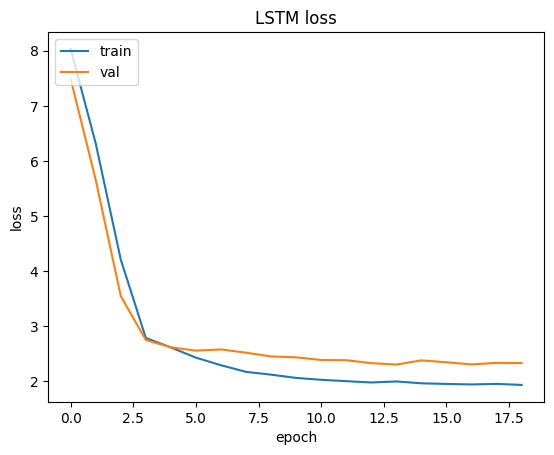

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('LSTM loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from keras import metrics

print("MAE: ", np.array(metrics.mean_absolute_error(labels[250:],model2.predict(sequences[250:]))).mean())
print("MSE: ", np.array(metrics.mean_squared_error(labels[250:], model2.predict(sequences[250:]))).mean())
print("RMSE: ", np.sqrt(metrics.mean_squared_error(labels[250:],model2.predict(sequences[250:]))).mean())
print("MAPE: ", np.array(metrics.mean_absolute_percentage_error(labels[250:],model2.predict(sequences[250:]))).mean(),'\n')

435/435 [==============================] - 2s 4ms/step
MAE:  2.365002
435/435 [==============================] - 2s 4ms/step
MSE:  8.373425
435/435 [==============================] - 2s 4ms/step
RMSE:  2.365002
435/435 [==============================] - 2s 5ms/step
MAPE:  44.218647 

